Question 1: Use the House Prices dataset from Kaggle to build a linear regression model to
predict house prices.

Load the dataset
● Preprocess the dataset
● Build and train linear regression model
● Evaluate its performance using Mean Square Error (MSE)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/kc_house_data.csv")

# Check for missing values
print(data.isnull().sum())

# Drop the 'sqft_above' column
data.drop(['sqft_above'], axis='columns', inplace=True)

# Create a new column based on the 'date' column
conv_dates = [1 if '2014' in str(values) else 0 for values in data.date]
data['date'] = conv_dates




id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# Display the first few rows to verify the chang
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,1,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Convert any string data to numberical data using suitable conversion

Identify the dependent variable (output label) and independent variables (input features)

In [ ]:
y=data[['price']].values
x=data.drop(['id', 'price'], axis = 1).values


In [ ]:
# Split the data into train data and test data

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

# Define and train (fit) the linear Regression model using training data

In [ ]:
# Model Training

LiRe = LinearRegression()
LiRe.fit(x_train, y_train)


LinearRegression()

# Test(predict) the output for the test data using the fitted model.

In [ ]:
y_predict=LiRe.predict(x_test)
print(y_predict)
print(y_test)

[[ 686558.25149804]
 [1015946.88463815]
 [  57738.89614541]
 ...
 [ 512658.01571143]
 [ 386632.19416203]
 [ 299113.81404014]]
[[624000.]
 [799990.]
 [237500.]
 ...
 [681000.]
 [290256.]
 [235000.]]


Performance of the model using suitable metric

In [ ]:
print('Coefficient of determination: %.3f' % r2_score(y_test,y_predict))

Coefficient of determination: 0.707


Question 2: Use the Iris dataset from Kaggle to build a K-Nearest Neighbors (KNN) classifier
to classify iris species. (Marks 20)

Load the dataset
● Preprocess the dataset
● Build and train KNN classifier
● Evaluate its performance using Accuracy and Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv("/content/Iris.csv")

In [ ]:
data.head()

In [ ]:
# Preprocess the dataset
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [ ]:

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,  confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Question 3: Use the Diabetes dataset from Kaggle to build a decision tree regressor to
predict diabetes progression. Train the model and evaluate its performance using Mean
Squared Error (MSE).

● Load the dataset
● Preprocess the dataset
● Build and train Decision Tree Regressor
● Evaluate its performance using Mean Square Error (MSE)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Preprocess the Dataset

In [4]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

Build and Train Decision Tree Regressor

In [11]:
# Initialize the model

model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

Evalute the Performance

In [13]:
# Predict on the test set
y_pred = model.predict(x_test)
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2532467532467532


Question 4: Use the Titanic dataset from Kaggle to build a logistic regression model to
predict whether a passenger survived or not. Train the model and evaluate its performance
using accuracy and confusion matrix.

● Load the dataset
● Preprocess the dataset
● Build and train Logistic Regression Model
● Evaluate its performance using Accuracy and Confusion Matrix

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocess the Dataset

In [17]:
# Checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [27]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Separate features and target

In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [38]:
# Dropping columns that won't be used
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

Data into training and testing sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build and Train Logistic Regression Model

In [41]:
# Initialize the m
model = LogisticRegression()

# Train the model

model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7988826815642458
Confusion Matrix:
[[89 16]
 [20 54]]


Question 5: Use "Heart Disease Dataset | Cleaned" dataset to build a classification model to
predict heart disease. (Marks 20)

Load the dataset:
Preprocess the dataset Include necessary data preprocessing steps, such as handling missing
values, encoding categorical variables, and scaling features.
Identify and separate the target variable from the dataset. The target variable indicates the presence
or absence of heart disease.
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

Train and evaluate the following algorithms:
● Logistic Regression
● Decision Tree Classifier
● Random Forest Classifier
● Gradient Boosting Classifier
● Support Vector Machine (SVM)

For each algorithm, calculate and compare the following metrics:

● Gini Coefficient (use AUC score for binary classification)
● Confusion Matrix
● Accuracy
● Precision
● Recall
● F1 Score
● AUC-ROC Curve
Report Findings:
Summarize the performance of each model. Discuss which model performed best based on the
evaluation metrics.

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('/content/heart_disease_cleaned.csv')

In [47]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.4+ KB


In [49]:
print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [51]:
data["target"] = data["num"].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=["num", "id"], inplace=True)
data = data.select_dtypes("number")

In [53]:
X = data.drop(columns=["target"])
Y = data["target"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=.2)

In [54]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

for name, model in models.items():
    model.fit(x_train, y_train)

evaluation_results = {}

def gini_coefficient(auc):
    return 2 * auc - 1

for name, model in models.items():
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    gini = gini_coefficient(auc)
    conf_matrix = confusion_matrix(y_test, y_pred)

    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc,
        'Gini Coefficient': gini,
        'Confusion Matrix': conf_matrix
    }

for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value}")
        else:
            print(f"{metric_name}:\n{value}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.75
Precision: 0.8181818181818182
Recall: 0.7431192660550459
F1 Score: 0.778846153846154
AUC: 0.8285015290519877
Gini Coefficient: 0.6570030581039754
Confusion Matrix:
[[57 18]
 [28 81]]


Model: Decision Tree Classifier
Accuracy: 0.717391304347826
Precision: 0.7821782178217822
Recall: 0.7247706422018348
F1 Score: 0.7523809523809524
AUC: 0.7157186544342506
Gini Coefficient: 0.4314373088685013
Confusion Matrix:
[[53 22]
 [30 79]]


Model: Random Forest Classifier
Accuracy: 0.7880434782608695
Precision: 0.8723404255319149
Recall: 0.7522935779816514
F1 Score: 0.8078817733990149
AUC: 0.8468501529051988
Gini Coefficient: 0.6937003058103977
Confusion Matrix:
[[63 12]
 [27 82]]


Model: Gradient Boosting Classifier
Accuracy: 0.75
Precision: 0.8118811881188119
Recall: 0.7522935779816514
F1 Score: 0.780952380952381
AUC: 0.8358409785932722
Gini Coefficient: 0.6716819571865444
Confusion Matrix:
[[56 19]
 [27 82]]


Model: Support Vector Machine
Accuracy: 0.69

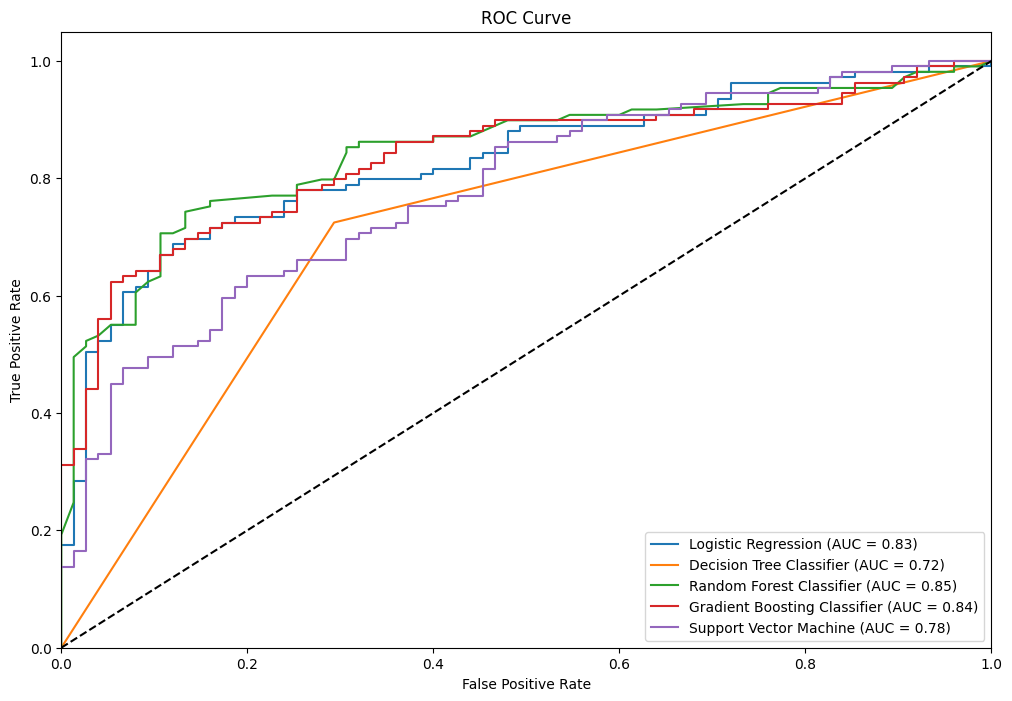

In [55]:
# Plot AUC-ROC Curves
plt.figure(figsize=(12, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()